In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

2024-07-27 14:52:28.381674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 14:52:28.381790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 14:52:28.581445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [3]:
base_dir = '/kaggle/input/retinal-fundus-images/Retinal Fundus Images'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['val', 'test', 'train']

Contents of train directory:
['2.Wet AMD', '3.Mild DR', '8.Hypertensive Retinopathy', '11.Normal Fundus', '10.Glaucoma', '5.Severe DR', '6.Proliferate DR', '7.Cataract', '4.Moderate DR', '9.Pathological Myopia', '1.Dry AMD']

Contents of validation directory:
['2.Wet AMD', '3.Mild DR', '8.Hypertensive Retinopathy', '11.Normal Fundus', '10.Glaucoma', '5.Severe DR', '6.Proliferate DR', '7.Cataract', '4.Moderate DR', '9.Pathological Myopia', '1.Dry AMD']


In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

X_data = []
Y_data = []
image_size = 150
labels = ['1.Dry AMD', '3.Mild DR', '4.Moderate DR', '5.Severe DR', '6.Proliferate DR', '11.Normal Fundus', '8.Hypertensive Retinopathy', '2.Wet AMD']

# Process training images
for label in labels:
    folder_path = os.path.join('/kaggle/input/retinal-fundus-images/Retinal Fundus Images/train', label)
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X_data.append(img)
                Y_data.append(label)
            else:
                print(f"Error reading image {file_name} in {folder_path}")
    else:
        print(f"Directory {folder_path} does not exist")

# Process test images
for label in labels:
    folder_path = os.path.join('/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test', label)
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                X_data.append(img)
                Y_data.append(label)
            else:
                print(f"Error reading image {file_name} in {folder_path}")
    else:
        print(f"Directory {folder_path} does not exist")

X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=101)

# Convert labels to integer indices
y_train_new = [labels.index(i) for i in y_train]
y_test_new = [labels.index(i) for i in y_test]

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=len(labels))
Y_test = tf.keras.utils.to_categorical(y_test_new, num_classes=len(labels))

In [5]:
test_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test"
train_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/train"

# Count the number of files in each directory
num_test_files = len(os.listdir(test_path))
num_train_files = len(os.listdir(train_path))

# Print the counts
print(f"Number of test files: {num_test_files}")
print(f"Number of train files: {num_train_files}")

Number of test files: 11
Number of train files: 11


In [6]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(labels), activation='softmax'))  # Assuming you have 8 classes

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,449,096 (16.97 MB)

 Trainable params: 4,449,096 (16.97 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
  1/425 ━━━━━━━━━━━━━━━━━━━━ 3:22:27 29s/step - accuracy: 0.0938 - loss: 23.4829

I0000 00:00:1722092234.489928      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722092234.515166      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.2870 - loss: 3.1387

W0000 00:00:1722092273.254006      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722092274.249386      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


425/425 ━━━━━━━━━━━━━━━━━━━━ 71s 101ms/step - accuracy: 0.2870 - loss: 3.1363 - val_accuracy: 0.3057 - val_loss: 1.9087
Epoch 2/10
  2/425 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step - accuracy: 0.2812 - loss: 2.0078

W0000 00:00:1722092277.348805      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


425/425 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.3558 - loss: 1.7356 - val_accuracy: 0.5756 - val_loss: 0.9915
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - accuracy: 0.5992 - loss: 0.9141 - val_accuracy: 0.6114 - val_loss: 0.8431
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.6345 - loss: 0.8012 - val_accuracy: 0.6373 - val_loss: 0.7435
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.6385 - loss: 0.7637 - val_accuracy: 0.6233 - val_loss: 0.7694
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.6609 - loss: 0.7359 - val_accuracy: 0.6426 - val_loss: 0.7351
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.6716 - loss: 0.7131 - val_accuracy: 0.6552 - val_loss: 0.7188
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.6663 - loss: 0.7262 - val_accuracy: 0.6625 - val_loss: 0.6742
Epoch 9/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.6734 - loss: 0.6805 - val_accurac

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

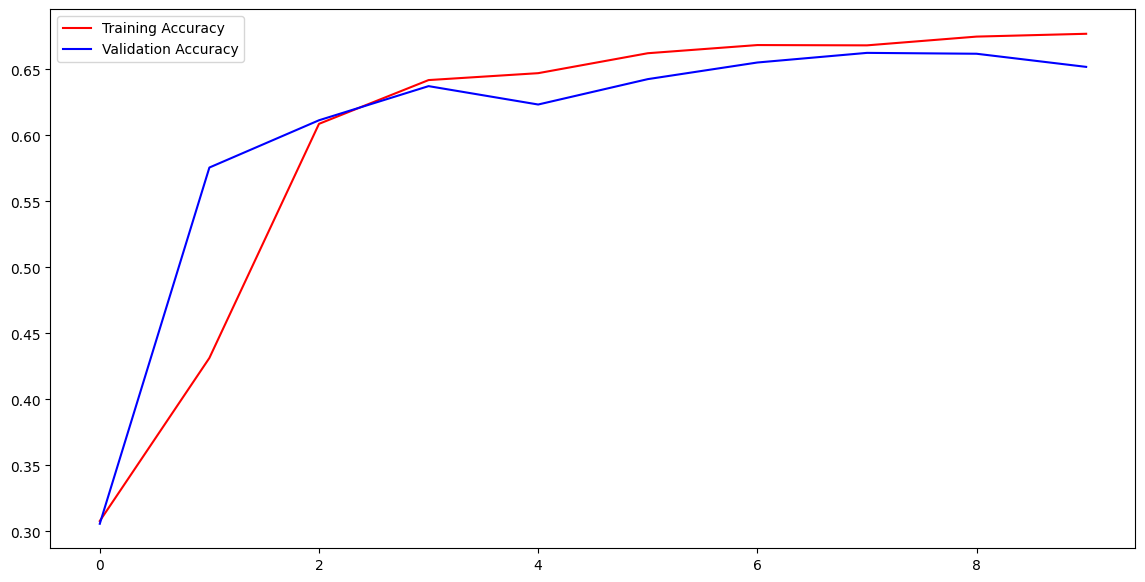

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label ="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

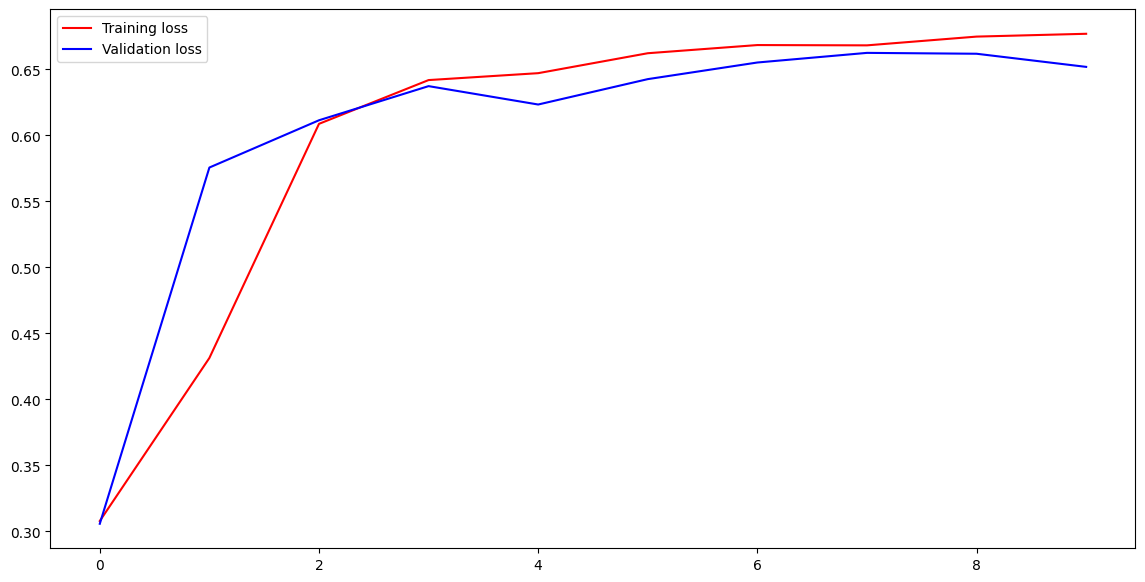

In [12]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label ='Training loss')
plt.plot(epochs, val_acc, 'b', label="Validation loss")
plt.legend (loc='upper left')
plt.show()

In [13]:
img = cv2.imread("/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test/11.Normal Fundus/4059_left.jpeg")
img= cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [14]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

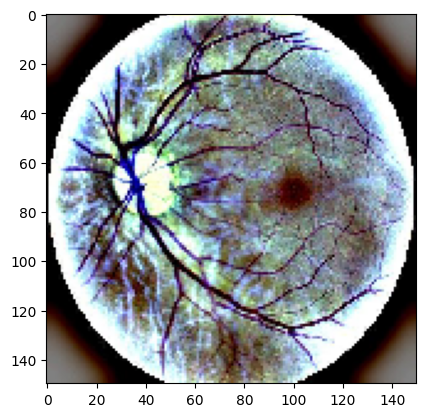

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image from file
img_path = "/kaggle/input/retinal-fundus-images/Retinal Fundus Images/test/11.Normal Fundus/4059_left.jpeg"
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Display the image
plt.imshow(img_array.astype('uint8'))
plt.axis('on')
plt.show()

 8/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

W0000 00:00:1722092558.702812      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step


W0000 00:00:1722092563.081347      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


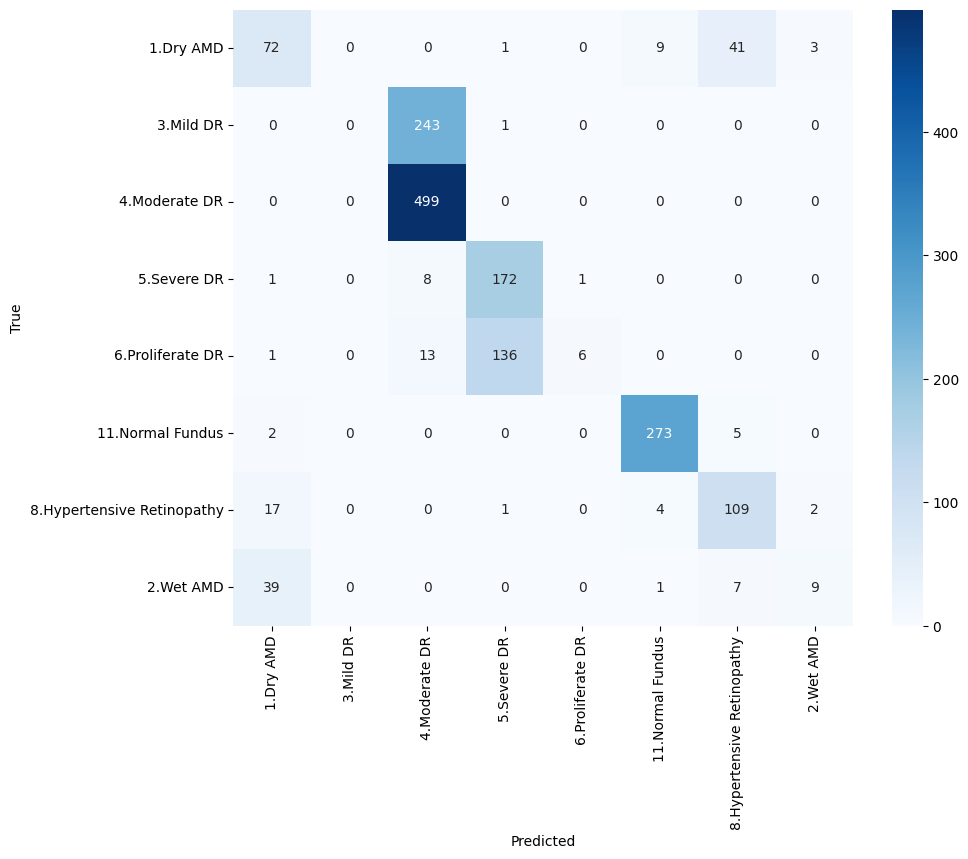

                            precision    recall  f1-score   support

                 1.Dry AMD       0.55      0.57      0.56       126
                 3.Mild DR       0.00      0.00      0.00       244
             4.Moderate DR       0.65      1.00      0.79       499
               5.Severe DR       0.55      0.95      0.70       182
          6.Proliferate DR       0.86      0.04      0.07       156
          11.Normal Fundus       0.95      0.97      0.96       280
8.Hypertensive Retinopathy       0.67      0.82      0.74       133
                 2.Wet AMD       0.64      0.16      0.26        56

                  accuracy                           0.68      1676
                 macro avg       0.61      0.56      0.51      1676
              weighted avg       0.61      0.68      0.59      1676



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(Y_test, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=labels))